In [1]:
import torch
import torchvision

# ToTensor() 转换将数据集中的图像数据转换为 PyTorch 张量，这将使得我们可以直接将图像作为模型输入。
transformation = torchvision.transforms.ToTensor()

In [2]:
train_dataset = torchvision.datasets.MNIST(root='./mnist/data', train=True, download=True, transform=transformation)
test_dataset = torchvision.datasets.MNIST(root='./mnist/data', train=False, download=True, transform=transformation)

In [3]:
batch_size = 64
# 将数据载入数据加载器中
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

torch.Size([64, 1, 28, 28]) torch.Size([64])
tensor(4)


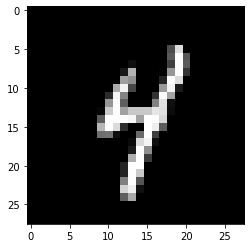

In [4]:
import matplotlib.pyplot as plt

# 检查输入数据的正确性
for images, labels in train_dataloader:
    # 打印出 images 和 labels 的形状
    print(images.shape, labels.shape)
    print(labels[0])# 打印出了 labels 中的第一个元素。
    plt.imshow(images[0][0], cmap='gray') # 显示该图像
    plt.show()
    break

In [5]:
import torch.nn as nn

# 定义一个名为 Model 的类，它继承自 nn.Module 类
class Model(nn.Module):
    # 定义 __init__ 函数，用于初始化模型的参数
    def __init__(self, input_size, output_size):
        # 调用 nn.Module 的构造函数
        super().__init__()
        # 定义一个线性层，其输入大小为 input_size，输出大小为 output_size
        self.linear = nn.Linear(input_size, output_size)
    
    # 定义 forward 函数，用于前向传播
    def forward(self, x):
        # 计算线性层的输出，即模型的 logit 值
        logits = self.linear(x)
        # 返回模型的 logit 值
        return logits

# 定义超参数
input_size = 28*28
output_size = 10
model = Model(input_size, output_size)

In [6]:
import torch.nn as nn

# 定义交叉熵损失函数
criterion = nn.CrossEntropyLoss()

# 定义随机梯度下降优化器，其中 model.parameters() 获取模型的所有可学习参数
# lr 表示学习率，控制优化器在更新参数时的步长大小
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [7]:
# 定义 evaluate 函数，用于评估给定模型在指定数据集上的准确率
def evaluate(model, data_loader):
    # 将模型设为评估模式，即关闭 dropout 和 batch normalization 等随机性操作
    model.eval()
    # 定义变量用于记录分类正确的样本数量和总样本数量
    correct = 0
    total = 0
    # 在上下文管理器中使用 torch.no_grad()，以避免在评估模型时计算梯度和更新模型参数
    with torch.no_grad():
        # 遍历数据加载器中的每个 batch
        for x, y in data_loader:
            # 将输入数据 x 变形为二维张量，第一维是 batch_size，第二维是 input_size
            x = x.view(-1, input_size)
            # 计算模型的输出，即 logits
            logits = model(x)
            # 从 logits 中选取最大值作为预测值，并返回预测值的索引
            _, predicted = torch.max(logits.data, 1)
            # 更新总样本数量
            total += y.size(0)
            # 更新分类正确的样本数量
            correct += (predicted == y).sum().item()
    # 计算准确率，并返回
    return correct / total

In [8]:
# 对神经网络进行多次训练迭代
for epoch in range(10):
    # 遍历训练集数据加载器中的每个 batch
    for images, labels in train_dataloader:
        # 将图像和标签转换成张量
        images = images.view(-1, 28*28)
        labels = labels.long()
        
        # 前向传播，计算模型的输出和损失
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # 反向传播和优化，即计算梯度并更新模型参数
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    # 在测试集上评估模型的准确率，并输出
    accuracy = evaluate(model, test_dataloader)
    print(f'Epoch {epoch+1}: test accuracy = {accuracy:.2f}')

Epoch 10: test accuracy = 0.91
